In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
# mengetahui anatomi dari jumlah kolom dan row
data.shape

(7043, 21)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Bisa dilihat dari tipe data untuk total charges masih berbentuk object maka harus diubah int

In [6]:
## Proses convert total charges menjadi int
data['TotalCharges'] = data['TotalCharges'].apply(pd.to_numeric, errors='coerce').fillna(0.0)

In [7]:
data['TotalCharges'].astype(float).astype(int)

0         29
1       1889
2        108
3       1840
4        151
        ... 
7038    1990
7039    7362
7040     346
7041     306
7042    6844
Name: TotalCharges, Length: 7043, dtype: int32

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
data['Churn'].replace({'Yes':1,'No':0},inplace=True)

In [10]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [11]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304,0.265370
std,0.368612,24.559481,30.090047,2266.794470,0.441561
min,0.000000,0.000000,18.250000,0.000000,0.000000
25%,0.000000,9.000000,35.500000,398.550000,0.000000
50%,0.000000,29.000000,70.350000,1394.550000,0.000000
75%,0.000000,55.000000,89.850000,3786.600000,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000


In [12]:
data.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

## Data Cleaning

In [13]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [14]:
data.duplicated().sum()

0

- Tidak ada missing values.
- Data types sudah sesuai dengan visual looking dari data tersebut.
- Tidak ada dupplikasi data
- The data is ready for exploration.

In [15]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1


## Creating Additional Column

In [16]:
data.tenure.min(),data.tenure.max()

(0, 72)

In [17]:
data.MonthlyCharges.min(),data.MonthlyCharges.max()

(18.25, 118.75)

In [18]:
data.TotalCharges.min(),data.TotalCharges.max()

(0.0, 8684.8)

In [19]:
data['tenure_group']=pd.cut(data['tenure'],bins=[-1,25,48,73],labels=['Low','Medium','High'])
data['MonthlyCharges_group']=pd.cut(data['MonthlyCharges'],bins=[18,52,85,119],labels=['Low','Medium','High'])
data['TotalCharges_group']=pd.cut(data['TotalCharges'],bins=[0,2895,5790,8685],labels=['Low','Medium','High'])

## Statistical Summary

In [20]:
categoricals = ['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','PaymentMethod']

numericals = ['tenure','MonthlyCharges','TotalCharges','Churn','SeniorCitizen']

In [21]:
# numerical statistical sumary
data[numericals].describe()

,tenure,MonthlyCharges,TotalCharges,Churn,SeniorCitizen
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304,0.265370,0.162147
std,24.559481,30.090047,2266.794470,0.441561,0.368612
min,0.000000,18.250000,0.000000,0.000000,0.000000
25%,9.000000,35.500000,398.550000,0.000000,0.000000
50%,29.000000,70.350000,1394.550000,0.000000,0.000000
75%,55.000000,89.850000,3786.600000,1.000000,0.000000
max,72.000000,118.750000,8684.800000,1.000000,1.000000


Observation:
* Overall untuk data tersebut tidak ada data yang ekstrim
* `SeniorCitizen` dan `Churn` disini adalah boolean karena data di kolom tersebut adalah 1 dan 0
* Mean ~ 50% (Median) di tenure, MonthlyCharges , and TotalCharges indikasi distribusi yang asimetris 

In [22]:
# describe method on categorical data
data[categoricals].describe()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,PaymentMethod
count,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,3,3,4
top,Male,No,No,Yes,No,Fiber optic,Electronic check
freq,3555,3641,4933,6361,3390,3096,2365


Observation :

* Data tersebut  50 persen laki-laki dan setengahnya lagi adalah perempuan
* jenis internet service yang digunakan adalah fiber optic
* Mostly, menggunakan phone service
* Dari informasi tersebut cenderung lebih banyak tidak punya partner dan dependents
* Banyak dari kalangan non senior citizen

In [23]:
for col in categoricals:
  print(f"Value counts of {col} column")
  print(data[col].value_counts(), '\n')

Value counts of gender column
Male      3555
Female    3488
Name: gender, dtype: int64 

Value counts of Partner column
No     3641
Yes    3402
Name: Partner, dtype: int64 

Value counts of Dependents column
No     4933
Yes    2110
Name: Dependents, dtype: int64 

Value counts of PhoneService column
Yes    6361
No      682
Name: PhoneService, dtype: int64 

Value counts of MultipleLines column
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64 

Value counts of InternetService column
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64 

Value counts of PaymentMethod column
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64 



## Univariate Analysis

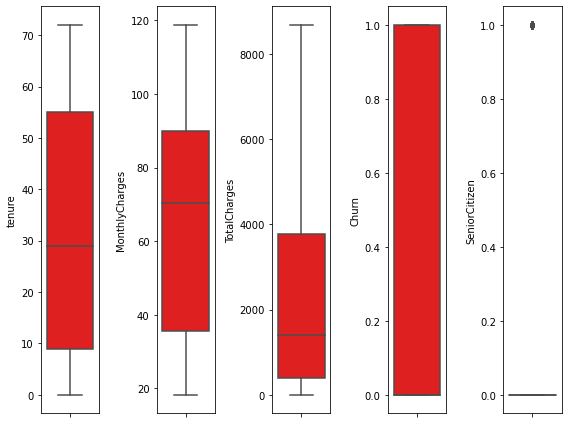

In [24]:
# adjust the figure size for better readability
plt.figure(figsize=(8,6))

# plotting
features = numericals
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=data[features[i]], color='red')
    plt.tight_layout()

Observation :

* Tidak ada outlier untuk numericals

D:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warni

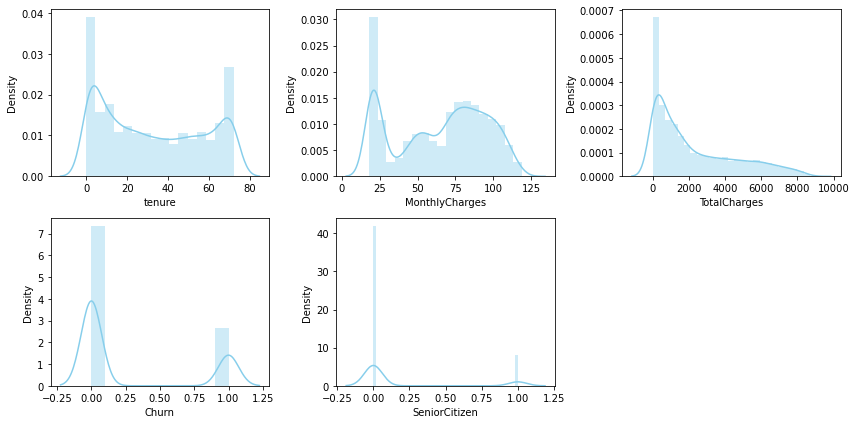

In [25]:
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

features = numericals
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    #plt.subplot(1, len(features), i+1)
    sns.distplot(x=data[features[i]], color='skyblue')
    plt.xlabel(features[i])
    plt.tight_layout()

Observation : 
* Dari plot figure diatas bisa dikatakan bahwa untuk `tenure` dan `monthlycharges` merupakan data discrete 
* `totalcharges` disini merupakan data continous namun berbentuk skew positif
* variabel target disini yaitu churn dan hasilnya adalah masih banyak dari pelanggan masih setia namun tetap saja harus melakukan analisa dengan melihat faktor apa yang membuat orang meninggalkan dalam menggunakan produk perusahaan.

<AxesSubplot:>

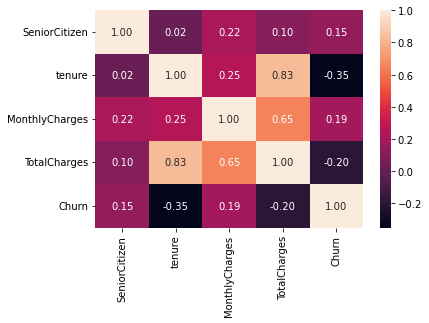

In [26]:
# correlation heatmap
correlation = data.corr()
sns.heatmap(correlation, annot=True, fmt='.2f')

Oservation :
* semakin lama dalam berlangganan (tenure) totalcharges akan bertambah
* Semakin besar monthlycharges berpengaruh pada totalcharges
* Seniorcitizen mendapat monthlycharges yang lebih besar dari yang non senior

## MultiVariate Analysis (Target: Churn , InternetService)

In [27]:
print('        #######Churn Rates#######')
data.groupby(['InternetService','SeniorCitizen'])['Churn'].mean().nlargest()

        #######Churn Rates#######


InternetService  SeniorCitizen
Fiber optic      1                0.472924
                 0                0.399117
DSL              1                0.301158
                 0                0.176226
No               1                0.096154
Name: Churn, dtype: float64

In [28]:
def churn_rate(df,col,hue=None):
    sns.barplot(data=df,x=col,y='Churn',hue=hue,ci=None)
    plt.title(f'{col} Churn Rate')
    plt.show()

In [29]:
def churn_rates(df,cols,set_hue=None):
    fig , ax = plt.subplots(1,len(cols),figsize=(7*len(cols),6))
    for i , col in enumerate(cols):
        sns.barplot(
                      data=df
                      ,x=col , y='Churn'
                      ,ax=ax[i]
                      ,hue=set_hue
                        ,ci=None)
        ax[i].set_title(f'{col} Churn Rates')
    plt.show()

Demographic Info

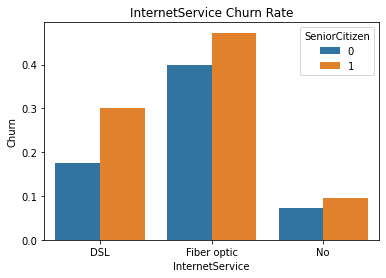

In [30]:
churn_rate(data,'InternetService','SeniorCitizen')

In [31]:
print('        #######Churn Rates#######')
data.groupby(['InternetService','Partner'])['Churn'].mean().nlargest()

        #######Churn Rates#######


InternetService  Partner
Fiber optic      No         0.496875
                 Yes        0.335561
DSL              No         0.256185
                 Yes        0.118151
No               No         0.106599
Name: Churn, dtype: float64

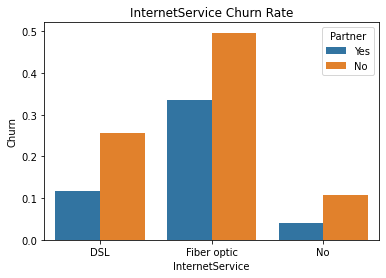

In [32]:
churn_rate(data,'InternetService','Partner')

In [33]:
print('        #######Churn Rates#######')
data.groupby(['InternetService','Dependents'])['Churn'].mean().nlargest()

        #######Churn Rates#######


InternetService  Dependents
Fiber optic      No            0.449877
                 Yes           0.305136
DSL              No            0.224629
                 Yes           0.119255
No               No            0.096263
Name: Churn, dtype: float64

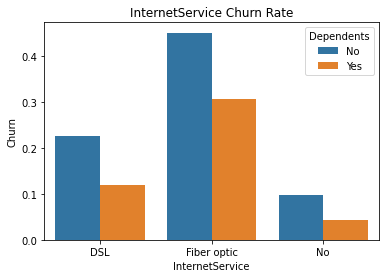

In [34]:
churn_rate(data,'InternetService','Dependents')

Customer Account Info

In [35]:
print('        #######Churn Rates#######')
data.groupby(['InternetService','PaymentMethod'])['Churn'].mean().nlargest()

        #######Churn Rates#######


InternetService  PaymentMethod            
Fiber optic      Electronic check             0.532288
                 Mailed check                 0.426357
DSL              Electronic check             0.319444
Fiber optic      Bank transfer (automatic)    0.289474
                 Credit card (automatic)      0.252931
Name: Churn, dtype: float64

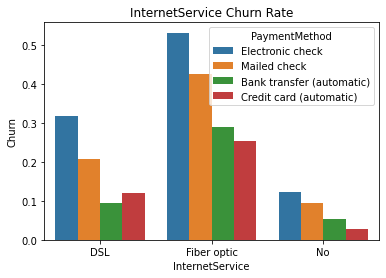

In [36]:
churn_rate(data,'InternetService','PaymentMethod')

In [37]:
print('        #######Churn Rates#######')
data.groupby(['InternetService','tenure_group'])['Churn'].mean().nlargest()

        #######Churn Rates#######


InternetService  tenure_group
Fiber optic      Low             0.628653
                 Medium          0.356406
DSL              Low             0.332432
Fiber optic      High            0.170611
No               Low             0.132732
Name: Churn, dtype: float64

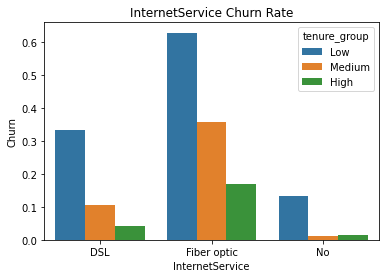

In [38]:
churn_rate(data,'InternetService','tenure_group')

In [39]:
print('        #######Churn Rates#######')
data.groupby(['InternetService','MonthlyCharges_group'])['Churn'].mean().nlargest()

        #######Churn Rates#######


InternetService  MonthlyCharges_group
Fiber optic      Medium                  0.535373
                 High                    0.359512
DSL              Low                     0.313578
                 Medium                  0.121771
No               Low                     0.074050
Name: Churn, dtype: float64

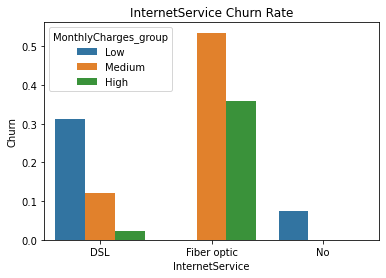

In [40]:
churn_rate(data,'InternetService','MonthlyCharges_group')

Conclusion :
* Senior citizen lebih cenderung tidak melanjutkan penggunaan daripada yang non senior dalam penggunaan internet service fiber optic
* pelanggan yang mempunyai partner cenderung tidak melanjutkan produk yang digunakan kemungkinan dikarenakan biaya hidup bersama yang bertambaha daripada yang single
* payment method yang bisa mempertinggi churn rate (tingkat kehilangan pelanggan) apabila dalam penggunaan fiber optic pembayaran masih dilakukan menggunakan electronic check
* semakin rendah tingkat tenure semakin tinggi rate churn
* semakin mahal dalam tagihan penagihan fiber optic membuat rate kehilangan pelanggan (churn) meningkat

EDA Questions

1. Jenis internet service apa yang memberikan churn yang lebih besar ?

In [41]:
# Top 10 products with the most transactions
most_churn = (data
            .groupby('InternetService') 
            .agg(confirmation =('Churn','sum'))
            .sort_values('confirmation',ascending=False)
            .reset_index())
most_churn

,InternetService,confirmation
0,Fiber optic,1297
1,DSL,459
2,No,113


2. Perbandingan jumlah biaya yang harus dikeluarkan untuk kategori senior citizen dengan non senior cictizen yang tetep setia dengan yang meninggalkan ?

In [42]:
comparison = (data
            .groupby(['SeniorCitizen','Churn']) 
            .agg(confirmation =('MonthlyCharges','sum'))
            .sort_values('confirmation',ascending=False)
            .reset_index())
comparison

,SeniorCitizen,Churn,confirmation
0,0,0,264250.50
1,0,1,100711.25
2,1,0,52735.25
3,1,1,38419.60


3. Metode pembayaran apa yang sering digunakan dalam transaksi ?

In [43]:
most_churn = (data
            .groupby('PaymentMethod') 
            .agg(transaction =('Churn','sum'))
            .sort_values('transaction',ascending=False)
            .reset_index())
most_churn

,PaymentMethod,transaction
0,Electronic check,1071
1,Mailed check,308
2,Bank transfer (automatic),258
3,Credit card (automatic),232
